In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter

from math import *
import spacy
import gensim
import pandas as pd
import numpy as np

from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

from gensim.models import CoherenceModel,LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim

import nltk
nltk.download("stopwords")
nltk.download("vader_lexicon")
nltk.download("punkt")

from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

import os,re,operator,warnings
warnings.filterwarnings("ignore")
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Optiplex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
def clean(text):
    return str("".join([i if ord(i) < 128 else " " for i in text]))

test_data_dir = "{}".format(os.sep).join([gensim.__path__[0],"test","test_data"])
lee_train_file = test_data_dir + os.sep + "lee_background.cor"

In [22]:
text = open(lee_train_file).read()
nlp = spacy.load("en_core_web_lg")
stop_words = stopwords.words("english")

In [23]:
for stop_word in stop_words:
    lexene = nlp.vocab[stop_word]
    lexene.is_stop=True

In [24]:
doc = nlp(clean(text))

In [25]:
doc

Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year's Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at this

In [30]:
texts, article = [],[]

for w in doc:
    if w.text != "\n" and not w.is_stop and not w.is_punct and not w.like_num:
        article.append(w.lemma_)
    if w.text =="\n":
        texts.append(article)
        article = []

len(article), len(texts)

(142, 299)

In [40]:
transformed_texts = [" ".join(i) for i in texts]

In [41]:
transformed_texts_1 = [i.lower() for i in transformed_texts]

In [42]:
transformed_texts_2 = [re.sub(r"\w*\d\w*","",i).strip() for i in transformed_texts_1]

In [27]:
spacy.explain("ADJ")

'adjective'

In [54]:
doc2 = nlp(" ".join([x for x in transformed_texts_2]))

In [105]:
###ADJECTIVES

adj = 0
adj_list = list()
for token in doc:
    if token.text not in adj_list and token.pos_ == "ADJ":
        adj_list.append(token.text)
        adj +=1

In [100]:
adj

955

In [110]:
###ENTITIES
doc2 = nlp(" ".join([x for x in transformed_texts_2]))

doc2_ents = doc2.ents
entity = 0
ent_list = list()

for token in doc2_ents:
    if token.text not in ent_list:
        ent_list.append(token.text)
        entity +=1

In [111]:
entity

495

In [107]:
doc2.ents

(today,
 sydney,
 claire richards,
 night,
 kilometer,
 dozen,
 india,
 india,
 pakistan,
 december,
 yesterday,
 hafiz mohammed,
 karachi,
 india,
 india,
 pakistan,
 week ago,
 week ago,
 end year,
 year,
 britain,
 afghanistan,
 today,
 monica seles jan michael,
 year old,
 minute year old,
 americans,
 tennis year,
 american,
 hundred,
 years eve,
 afternoon,
 thursday,
 overnight,
 friday,
 sydney,
 newcastle,
 morning,
 overnight,
 grafton,
 phil,
 picton,
 hour,
 sydney,
 picton,
 appin,
 morning,
 ten thousand,
 queensland,
 night,
 early evening,
 year eve,
 alejandro,
 pervez musharraf,
 pakistan,
 india,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 pakistan,
 musharraf,
 india,
 pakistan,
 musharraf,
 indian,
 india,
 india,
 friday,
 vajpayee,
 january,
 india,
 india,
 pakistan,
 december,
 india,
 pakistan,
 pakistan,
 pakistan,
 abdul sattar,
 saturday,
 musharraf,
 sunday,
 pakistan,
 abdullah,
 british,
 israeli,
 palestinian,
 israeli,
 palestini

In [85]:
doc2

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

In [57]:
len(transformed_texts_2)

299

In [43]:
transformed_texts_2

['hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact pro

In [138]:
def IDF(corpus,unique_words):
    
    idf_dict = dict()
    N=len(corpus)
    
    for i in unique_words:
        counter = 0
        for sen in corpus:
            if i in sen.split():
                counter +=1
            idf_dict[i] = (log((N+1)/(counter+1)))+1
    return idf_dict

def fit(whole_data):
    unique_words = set()
    
    if isinstance(whole_data,(list,)):
        for x in whole_data:
            for y in x.split():
                if len(y) < 2 :
                    continue
                unique_words.add(y)
        unique_words = sorted(list(unique_words))
        vocab = {j:i for i,j in enumerate(unique_words)}
        Idf_values_of_all_unique_words = IDF(whole_data,unique_words)
    return vocab, Idf_values_of_all_unique_words
    
def transform(dataset,vocabulary,idf_values):
    vocab = {}
    sparse_matrix = csr_matrix( (len(dataset),len(vocabulary)), dtype=np.float64)
    
    for row in range(0,len(dataset)):
        number_of_words_in_sentence = Counter(dataset[row].split())
        for word in dataset[row].split():
            if word in list(vocabulary.keys()):
                tf_idf_value = (number_of_words_in_sentence[word])/len(dataset[row].split())*(idf_values[word])
                sparse_matrix[row,vocabulary[word]] = tf_idf_value
                vocab[word] = tf_idf_value
                
    return vocab

In [129]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_2)

In [130]:
Vocabulary

{'aamer': 0,
 'aarage': 1,
 'abandon': 2,
 'abate': 3,
 'abbott': 4,
 'abc': 5,
 'abdel': 6,
 'abdomen': 7,
 'abdominal': 8,
 'abduct': 9,
 'abduction': 10,
 'abdul': 11,
 'abdullah': 12,
 'abegglen': 13,
 'abide': 14,
 'ability': 15,
 'able': 16,
 'abloy': 17,
 'ablution': 18,
 'ably': 19,
 'aboard': 20,
 'aboriginal': 21,
 'abortion': 22,
 'abroad': 23,
 'abruptly': 24,
 'abscond': 25,
 'absolutely': 26,
 'abstain': 27,
 'abu': 28,
 'abuse': 29,
 'abusive': 30,
 'aca': 31,
 'academic': 32,
 'accc': 33,
 'accelerate': 34,
 'accept': 35,
 'acceptable': 36,
 'access': 37,
 'accident': 38,
 'accolade': 39,
 'accommodation': 40,
 'accompany': 41,
 'accomplishment': 42,
 'accord': 43,
 'account': 44,
 'accountable': 45,
 'accountancy': 46,
 'accounting': 47,
 'accrue': 48,
 'accumulate': 49,
 'accuracy': 50,
 'accurate': 51,
 'accusation': 52,
 'accuse': 53,
 'acdt': 54,
 'achieve': 55,
 'achievement': 56,
 'acknowledge': 57,
 'acquisition': 58,
 'acquit': 59,
 'act': 60,
 'action': 61,
 '

In [131]:
sorted_idf = dict(sorted(idf_of_vocabulary.items(),key=operator.itemgetter(1),reverse=True))

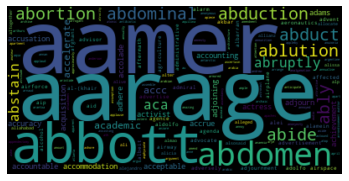

In [132]:
wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [176]:
stop_words.extend(["aamer"])
stopwords_dict = Counter(stop_words)
transformed_texts_3 = [" ".join([word for word in i.split()
                                 if word not in stopwords_dict])
                       for i in transformed_texts_2]

In [159]:
stopwords_dict

Counter({'i': 1,
         'me': 1,
         'my': 1,
         'myself': 1,
         'we': 1,
         'our': 1,
         'ours': 1,
         'ourselves': 1,
         'you': 1,
         "you're": 1,
         "you've": 1,
         "you'll": 1,
         "you'd": 1,
         'your': 1,
         'yours': 1,
         'yourself': 1,
         'yourselves': 1,
         'he': 1,
         'him': 1,
         'his': 1,
         'himself': 1,
         'she': 1,
         "she's": 1,
         'her': 1,
         'hers': 1,
         'herself': 1,
         'it': 1,
         "it's": 1,
         'its': 1,
         'itself': 1,
         'they': 1,
         'them': 1,
         'their': 1,
         'theirs': 1,
         'themselves': 1,
         'what': 1,
         'which': 1,
         'who': 1,
         'whom': 1,
         'this': 1,
         'that': 1,
         "that'll": 1,
         'these': 1,
         'those': 1,
         'am': 1,
         'is': 1,
         'are': 1,
         'was': 1,
         'were': 1

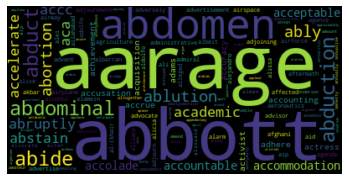

In [177]:
Vocabulary, idf_of_vocabulary = fit(transformed_texts_3)

wordcloud = WordCloud().generate_from_frequencies(idf_of_vocabulary)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [139]:
final_output = transform(transformed_texts_3,Vocabulary,idf_of_vocabulary)

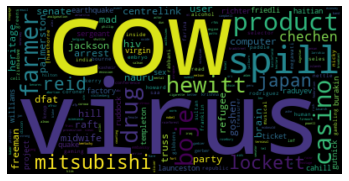

In [140]:
wordcloud = WordCloud().generate_from_frequencies(final_output)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### SHORTCUT OF TFIDF

In [149]:
tfidf= TfidfVectorizer(sublinear_tf=True,norm="l2",min_df=5,encoding="latin-1",ngram_range=(1,1)
                      ,stop_words=stop_words)
features = tfidf.fit_transform(transformed_texts_3)
d = tfidf.vocabulary_

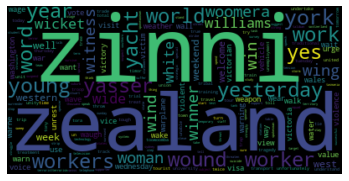

In [150]:
wordcloud = WordCloud().generate_from_frequencies(d)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [155]:
%%markdown
### VADER

### VADER


In [156]:
sid = SentimentIntensityAnalyzer()
for i in range(len(transformed_texts_3)):
    print(transformed_texts_3[i]+ ":")
    scores = sid.polarity_scores(transformed_texts_3[i])
    print(scores)

hundred people force vacate home southern highlands new south wales strong wind today push huge bushfire town hill new blaze near goulburn south west sydney force closure hume highway : aedt marked deterioration weather storm cell move east blue mountains force authority decision evacuate people home outlying street hill new south wales southern highland estimated resident leave home nearby mittagong new south wales rural fire service say weather condition cause fire burn finger formation ease fire unit hill optimistic defend property blaze burn new year eve new south wales fire crew call new fire gunning south goulburn detail available stage fire authority say close hume highway direction new fire sydney west long threaten property cranebrook area rain fall part illawarra sydney hunter valley north coast bureau meteorology claire richards say rain little ease fire burn state fall isolate area generally fall millimetre say place significant millimetre relief far rain concern fact proba

{'neg': 0.131, 'neu': 0.823, 'pos': 0.046, 'compound': -0.7096}
australia aim early wicket day cricket test south africa mcg proteas resume day badly affect rain possible australian paceman glenn mcgrath wicket say catch take matthew hayden yesterday typical australia outstanding slip field summer series far great catch ricky ponting test occasionally say give confidence know cent catch fly slip slip go take:
{'neg': 0.049, 'neu': 0.775, 'pos': 0.176, 'compound': 0.8417}
thousand firefighter remain ground new south wales morning assess extent fire burn sydney state south coast firefighter battle fire band stretch campbelltown south west sydney royal national park hundred people evacuate small village south south west sydney authority estimate property destroy great sydney area home destroy hawkesbury area north sydney property ruin jervis bay john winter new south wales rural fire service say firefighter main concern fire band campbelltown coast go difficult area today expect royal nat

{'neg': 0.027, 'neu': 0.506, 'pos': 0.467, 'compound': 0.9926}
australian cricket selector change squad beat south africa opening test test beginning melbourne boxing day predict queensland pace bowler andy bichel replace spin bowler stuart macgill man adelaide test macgill take wicket new south wales day tour match south africa scg yesterday sway selector:
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
prime minister throw support governor general dr peter hollingworth child right campaigner accuse dr hollingworth try cover child abuse allegation toowoomba anglican school archbishop brisbane statement release early week governor general say allegation unfounded continue call dr hollingworth resign mr howard say confidence governor general direct knowledge matter talk try form judgment mr howard say criticism involve cover evidence ridiculous:
{'neg': 0.189, 'neu': 0.713, 'pos': 0.097, 'compound': -0.7717}
united nations security council authorise multinational force help peace 

{'neg': 0.254, 'neu': 0.628, 'pos': 0.119, 'compound': -0.9638}
australian authority grant access david hicks arrest northern alliance afghanistan attorney general daryl williams say year old south australia hold custody united states aboard uss peleliu arabian sea mr williams say suspect al qaeda fighter interrogate team asio federal police officer propose interrogate asio afp team say capture northern alliance team conflict situation hold military custody appropriate practice context follow mr williams say imagine offer legal representation present circumstance:
{'neg': 0.089, 'neu': 0.772, 'pos': 0.139, 'compound': 0.2263}
pentagon say military continue search cave tora bora region eastern afghanistan local afghan force pull official unsure suspect terrorist mastermind osama bin laden region united states government say close find bin laden mission stay focused tora bora local anti taliban fighter pull believe al qaeda member leave deputy defence secretary paul wolfowitz discuss opt

{'neg': 0.069, 'neu': 0.748, 'pos': 0.183, 'compound': 0.8979}
yasser arafat accuse israel escalate violence kill palestinians include child day call end anti israeli attack israel prime minister ariel sharon say wait action promise palestinian leader accuse mr arafat prevent attack telephone french president jacques chirac prime minister office report president chirac say mr arafat remain negotiating partner israel separate call prime minister sharon palestinian leader televise address late yesterday mr arafat say persistent attack end perpetrator punish hail united nations middle east envoy terje roed larsen potential turning point search end violence large islamic radical group hamas issue statement vow continue holy war slam peace invitation mr sharon exterminate palestinians mr arafat close dozen hamas islamic jihad office response punish israeli air attack massive international pressure jail islamic extremist kill dozen israelis attack month violence continue today palestinian gu

{'neg': 0.292, 'neu': 0.598, 'pos': 0.111, 'compound': -0.9953}
afl lead goal kicker tony lockett nominate pre season draft lockett approach sydney swans return game week medium speculation decide good interest family come retirement today year old change mind inform swans intention nominate tuesday pre season draft statement release short time ago lockett say week feel rush feel comfortable decision say weekend time think matter family support comeback sydney say delighted lockett decide return intend draft:
{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.936}
pentagon believe finally confirm whereabouts osama bin laden area eastern afghanistan search focus united states air force drop kilogram bomb call daisy cutter mountain tora bora region day ago wreak havoc cave tunnel al qaeda hideout prompt flurry communication united states intercept communication pentagon believe osama bin laden run mountain fighter seriously injure blast chairman joint chiefs general richard myers say

{'neg': 0.098, 'neu': 0.722, 'pos': 0.18, 'compound': 0.8519}
qantas management union represent airline maintenance worker meet today marathon talk night fail resolve wage dispute union fight propose month wage freeze secure well career structure employee bill shorten australian workers union awu say union rest satisfactory outcome reach hour awu amwu talk qantas resume tomorrow morning aedt industrial relations commission work position member find say night ansett worker sing christmas carol prime minister kirribilli residence sydney morning remind john howard owe entitlement transport workers union twu hold hour picket outside kirribilli house say worker family face bleak christmas news south wales secretary twu tony sheldon say government promise deliver $ entitlement mr sheldon say financial situation worker reach crisis point little deliver government lot promise lot noise federal election little substance important john howard deliver tourism community ansett worker australian co

{'neg': 0.38, 'neu': 0.558, 'pos': 0.062, 'compound': -0.9992}
opposition force claim capture half kandahar airport fierce fighting taliban troop resident report cranking bombardment city take half airport say gul lali key lieutenant kandahar governor gul agha lali say force kill foreign taliban fighter operation overrun building appear office member suspect terrorist mastermind osama bin laden al qaeda network bin laden man egypt libya saudi arabia injure lali say battleground opposition commander early express confidence airport fall end day taliban defence tactic hamstring aerial attack warplane hope cent sure capture end evening spokesman gul agha say speak opposition leader noon local time bombing raid warplane taliban position airport help push accord fighter ground resident leave kandahar early monday confirm let bombing abdul masood say plane fly strong sortie frequency increase come interval half hour say target airport area taliban position outside city hit road city airport 

In [160]:
%%markdown
### TOPIC MODELING

### TOPIC MODELING


In [161]:
bigram = gensim.models.Phrases(texts)
texts = [bigram[line] for line in texts]

In [162]:
texts

[['hundred',
  'people',
  'force',
  'vacate',
  'home',
  'Southern',
  'Highlands',
  'New_South',
  'Wales',
  'strong',
  'wind',
  'today',
  'push',
  'huge',
  'bushfire',
  'town',
  'Hill',
  'new',
  'blaze',
  'near',
  'Goulburn',
  'south_west',
  'Sydney',
  'force',
  'closure',
  'Hume',
  'Highway',
  '4:00pm',
  'AEDT',
  'marked',
  'deterioration',
  'weather',
  'storm',
  'cell',
  'move',
  'east',
  'Blue_Mountains',
  'force',
  'authority',
  'decision',
  'evacuate',
  'people',
  'home',
  'outlying',
  'street',
  'Hill',
  'New_South',
  'Wales',
  'southern',
  'highland',
  'estimated',
  'resident',
  'leave',
  'home',
  'nearby',
  'Mittagong',
  'New_South',
  'Wales',
  'Rural_Fire',
  'Service',
  'say',
  'weather_condition',
  'cause',
  'fire_burn',
  'finger',
  'formation',
  'ease',
  'fire',
  'unit',
  'Hill',
  'optimistic',
  'defend',
  'property',
  'blaze',
  'burn',
  'New',
  'Year',
  'Eve',
  'New_South',
  'Wales',
  'fire',
  'c

In [165]:
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [166]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 2),
  (8, 1),
  (9, 2),
  (10, 3),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 4),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 3),
  (23, 1),
  (24, 4),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 2),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 3),
  (53, 1),
  (54, 1),
  (55, 5),
  (56, 2),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 2),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 3),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2),
  (83, 1),
  (84, 1),
  (85, 2),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 1),
  (90, 4),
  (91, 1)

In [167]:
lsimodel = LsiModel(corpus=corpus,num_topics=10,id2word=dictionary)

In [170]:
lsimodel.show_topics(num_topics=5)

[(0,
  '-0.788*"say" + -0.142*"Mr" + -0.095*"force" + -0.094*"israeli" + -0.094*"people" + -0.083*"Australia" + -0.082*"kill" + -0.080*"attack" + -0.079*"palestinian" + -0.079*"official"'),
 (1,
  '0.387*"israeli" + 0.345*"palestinian" + 0.286*"Mr_Arafat" + 0.192*"Israel" + 0.177*"official" + -0.164*"say" + 0.164*"Hamas" + 0.155*"kill" + 0.151*"West_Bank" + 0.136*"attack"'),
 (2,
  '-0.314*"Afghanistan" + -0.294*"force" + -0.218*"Al_Qaeda" + -0.195*"bin_Laden" + -0.159*"fighter" + -0.153*"Taliban" + -0.153*"Tora_Bora" + -0.150*"Pakistan" + -0.141*"afghan" + 0.115*"fire"'),
 (3,
  '0.403*"fire" + 0.290*"area" + 0.244*"Sydney" + 0.193*"firefighter" + 0.177*"north" + 0.167*"New_South" + 0.167*"Wales" + 0.167*"wind" + 0.141*"south" + 0.128*"line"'),
 (4,
  '0.240*"Australia" + 0.234*"test" + -0.226*"Mr" + 0.223*"day" + 0.195*"match" + 0.186*"South_Africa" + 0.186*"wicket" + 0.167*"good" + 0.155*"play" + 0.147*"run"'),
 (5,
  '-0.352*"Mr" + 0.308*"say" + -0.209*"force" + -0.190*"company" + 

In [171]:
ldamodel = LdaModel(corpus=corpus,num_topics=10,id2word=dictionary)
ldamodel.show_topics()

[(0,
  '0.026*"say" + 0.007*"Mr" + 0.006*"day" + 0.005*"people" + 0.004*"test" + 0.003*"time" + 0.003*"Australia" + 0.003*"fire" + 0.003*"man" + 0.003*"force"'),
 (1,
  '0.038*"say" + 0.008*"Mr" + 0.005*"year" + 0.004*"people" + 0.003*"Australia" + 0.003*"attack" + 0.003*"day" + 0.003*"report" + 0.003*"kill" + 0.003*"time"'),
 (2,
  '0.014*"say" + 0.006*"Australia" + 0.006*"Mr" + 0.005*"israeli" + 0.004*"day" + 0.004*"end" + 0.004*"tell" + 0.004*"year" + 0.003*"meeting" + 0.003*"palestinian"'),
 (3,
  '0.029*"say" + 0.005*"Mr" + 0.005*"people" + 0.004*"israeli" + 0.004*"today" + 0.004*"force" + 0.004*"day" + 0.004*"Sydney" + 0.004*"attack" + 0.003*"area"'),
 (4,
  '0.027*"say" + 0.008*"Australia" + 0.006*"man" + 0.005*"force" + 0.005*"Pakistan" + 0.004*"Afghanistan" + 0.004*"United_States" + 0.003*"Australian" + 0.003*"year" + 0.003*"arrest"'),
 (5,
  '0.026*"say" + 0.006*"Mr" + 0.004*"area" + 0.004*"people" + 0.004*"Australia" + 0.003*"company" + 0.003*"tell" + 0.003*"claim" + 0.003*"

In [172]:
hdpmodel = HdpModel(corpus=corpus,id2word=dictionary)
hdpmodel.show_topics()

[(0,
  '0.011*say + 0.005*company + 0.004*Mr + 0.002*director + 0.002*people + 0.002*Afghanistan + 0.002*Friedli + 0.002*Government + 0.002*cent + 0.002*time + 0.002*end + 0.002*staff + 0.002*ask + 0.002*reply + 0.002*entitlement + 0.002*administrator + 0.002*charge + 0.002*Austar + 0.002*know + 0.002*Taliban'),
 (1,
  '0.006*israeli + 0.005*say + 0.003*Mr_Arafat + 0.003*palestinian + 0.003*West_Bank + 0.003*official + 0.003*Mr_Sharon + 0.002*militant + 0.002*arrest + 0.002*fire + 0.002*source + 0.002*Hamas + 0.002*military + 0.002*Jenin + 0.002*Australia + 0.002*town + 0.002*decision + 0.002*group + 0.002*strike + 0.002*palestinian_leadership'),
 (2,
  '0.010*say + 0.004*airport + 0.003*Taliban + 0.002*opposition + 0.002*Launceston + 0.002*Kandahar + 0.002*night + 0.002*Virgin + 0.002*civilian + 0.002*kill + 0.002*bombing + 0.002*Gul + 0.002*leave + 0.001*flight + 0.001*force + 0.001*city + 0.001*near + 0.001*leak + 0.001*terminal + 0.001*tell'),
 (3,
  '0.005*say + 0.003*match + 0.00

In [173]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel,corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017871 -0.005006       1        1  22.046051
3      0.010082  0.002689       2        1  18.902708
4      0.051428  0.041062       3        1  14.053346
0      0.019986 -0.032570       4        1  12.830236
9      0.018528 -0.004087       5        1   8.376664
5      0.000587 -0.011463       6        1   6.490412
7     -0.022586 -0.047258       7        1   5.344691
2     -0.012283  0.010671       8        1   4.323745
8     -0.050357  0.042323       9        1   4.239790
6     -0.033255  0.003640      10        1   3.392359, topic_info=          Term        Freq       Total Category  logprob  loglift
90         say  813.000000  813.000000  Default  30.0000  30.0000
82      people  112.000000  112.000000  Default  29.0000  29.0000
992         Mr  160.000000  160.000000  Default  28.0000  28.0000
835    israeli   76.000000   76.000000  Default  27.0000  27.0000
200       year   93.000000   93.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
404     expect    1.747206   43.852984  Topic10  -6.3603   0.1608
838      month    1.761435   55.307035  Topic10  -6.3522  -0.0631
309  Australia    1.845769  117.187742  Topic10  -6.3055  -0.7672
136       come    1.756319   64.091476  Topic10  -6.3551  -0.2134
835    israeli    1.744223   76.354156  Topic10  -6.3620  -0.3954

[777 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
636       1  0.236504           
636       2  0.172003           
636       3  0.129002           
636       4  0.150503           
636       5  0.064501           
...     ...       ...        ...
178       6  0.024453  yesterday
178       7  0.073360  yesterday
178       8  0.073360  yesterday
178       9  0.048906  yesterday
178      10  0.048906  yesterday

[2123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 10, 6, 8, 3, 9, 7])

In [174]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdpmodel,corpus,dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster          Freq
topic                                                   
0      0.096354 -0.083789       1        1  1.709679e+01
1      0.074624  0.074555       2        1  7.844049e+00
2      0.069546 -0.002826       3        1  6.970842e+00
4      0.064254  0.073438       4        1  3.523739e+00
3      0.058576  0.039189       5        1  2.888669e+00
...         ...       ...     ...      ...           ...
145   -0.012277  0.021095     146        1  3.999873e-11
146   -0.007182  0.002661     147        1  1.988514e-11
147   -0.011625  0.001183     148        1  9.965306e-12
148   -0.018786 -0.002701     149        1  4.990283e-12
149   -0.022679 -0.007675     150        1  4.990283e-12

[150 rows x 5 columns], topic_info=             Term          Freq       Total  Category  logprob  loglift
2346      company  3.100000e+01   31.000000   Default  30.0000  30.0000
835       israeli  2.300000e+01   23.000000   Default  29.0000  29.0000
226           end  1.800000e+01   18.000000   Default  28.0000  28.0000
992            Mr  3.200000e+01   32.000000   Default  27.0000  27.0000
90            say  1.270000e+02  127.000000   Default  26.0000  26.0000
...           ...           ...         ...       ...      ...      ...
2879     Johnston  1.351786e-12    4.981315  Topic150  -7.0029   1.6934
3297  destruction  1.367234e-12    5.453081  Topic150  -6.9915   1.6143
2057    education  1.359475e-12    5.582637  Topic150  -6.9972   1.5851
3772       shrink  1.379226e-12    6.083652  Topic150  -6.9828   1.5136
1907     tomorrow  1.406011e-12    6.995462  Topic150  -6.9636   1.3932

[6574 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
636       1  0.389884           
636       2  0.077977           
636       4  0.077977           
636       8  0.077977           
636      14  0.077977           
...     ...       ...        ...
178      12  0.089810  yesterday
4752      1  0.239790      yield
2261      1  0.146130      young
2261      3  0.146130      young
2261      5  0.146130      young

[4329 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 5, 4, 6, 13, 35, 8, 16, 19, 7, 12, 9, 34, 10, 15, 41, 21, 20, 71, 23, 22, 43, 62, 11, 33, 55, 17, 18, 14, 49, 83, 28, 24, 77, 27, 67, 26, 32, 112, 52, 39, 40, 30, 50, 45, 59, 37, 46, 86, 91, 118, 96, 63, 54, 38, 122, 56, 42, 61, 110, 25, 87, 44, 95, 93, 31, 88, 103, 70, 47, 66, 113, 48, 75, 78, 133, 69, 29, 36, 109, 64, 76, 114, 80, 104, 116, 105, 115, 74, 99, 72, 92, 53, 51, 100, 129, 119, 60, 127, 143, 97, 57, 117, 85, 68, 138, 135, 120, 125, 79, 124, 65, 106, 58, 73, 81, 82, 84, 89, 90, 94, 98, 101, 102, 107, 108, 111, 121, 123, 126, 128, 130, 131, 132, 134, 136, 137, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150])

In [178]:
lsitopics = [[word for word,prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]
hdptopics = [[word for word,prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]
ldatopics = [[word for word,prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [179]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics[:10],texts=texts,dictionary=dictionary,window_size=10).get_coherence()

In [181]:
def evaluate_bar_graph(coherences,indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    
    plt.bar(x,coherences, width=0.2,tick_label=indices,align="center")
    plt.xlabel("Models")
    plt.ylabel("Coherences Value")
    plt.title("Topic Model Performance")

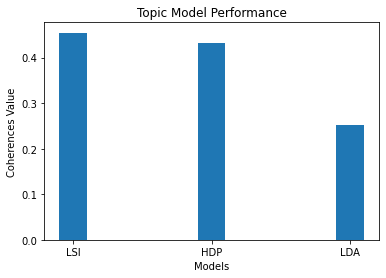

In [182]:
evaluate_bar_graph([lsi_coherence,hdp_coherence,lda_coherence],["LSI","HDP","LDA"])